In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 ... 0 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 ... 0 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 ... 0 1 0]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 ... 0 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 ... 1 0 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 ... 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


# Naive Bayes

Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.5138273887222787

 Grid scores on development set:
0.514 (+/-0.013) for {'var_smoothing': 1e-06}
0.514 (+/-0.013) for {'var_smoothing': 1e-07}
0.514 (+/-0.013) for {'var_smoothing': 1e-08}
0.514 (+/-0.013) for {'var_smoothing': 1e-09}
0.514 (+/-0.013) for {'var_smoothing': 1e-10}
0.514 (+/-0.013) for {'var_smoothing': 1e-11}
0.514 (+/-0.013) for {'var_smoothing': 1e-12}
0.514 (+/-0.013) for {'var_smoothing': 1e-13}
0.514 (+/-0.013) for {'var_smoothing': 1e-14}
0.514 (+/-0.013) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.54      0.23      0.33       405
         Bad       0.52      0.83      0.64       392
        Good       0.59      0.60      0.60       403

    accuracy                           0.55      1200
   macro avg       0.55      0.55      0.52 

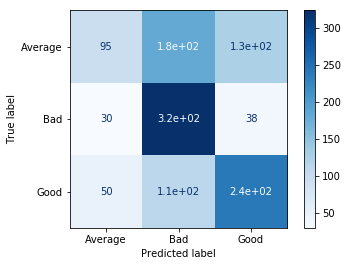

In [3]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.48536636 0.51010628 0.50258404 0.52354389 0.51960363]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.4688739965134472

 Grid scores on development set:
0.469 (+/-0.020) for {'var_smoothing': 1e-06}
0.469 (+/-0.020) for {'var_smoothing': 1e-07}
0.469 (+/-0.020) for {'var_smoothing': 1e-08}
0.469 (+/-0.020) for {'var_smoothing': 1e-09}
0.469 (+/-0.020) for {'var_smoothing': 1e-10}
0.469 (+/-0.020) for {'var_smoothing': 1e-11}
0.469 (+/-0.020) for {'var_smoothing': 1e-12}
0.469 (+/-0.020) for {'var_smoothing': 1e-13}
0.469 (+/-0.020) for {'var_smoothing': 1e-14}
0.469 (+/-0.020) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.46      0.28      0.35       405
         Bad       0.53      0.49      0.51       392
        Good       0.49      0.72      0.58       403

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.48 

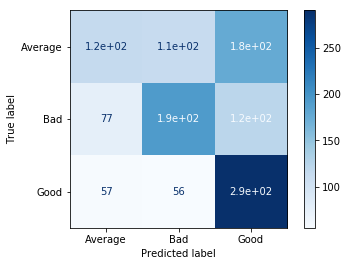

In [6]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.47942543 0.46982902 0.47266061 0.46363159 0.47202167]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 0 1]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 1 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.5471450832004444

 Grid scores on development set:
0.547 (+/-0.012) for {'var_smoothing': 1e-06}
0.547 (+/-0.012) for {'var_smoothing': 1e-07}
0.547 (+/-0.012) for {'var_smoothing': 1e-08}
0.547 (+/-0.012) for {'var_smoothing': 1e-09}
0.547 (+/-0.012) for {'var_smoothing': 1e-10}
0.547 (+/-0.012) for {'var_smoothing': 1e-11}
0.547 (+/-0.012) for {'var_smoothing': 1e-12}
0.547 (+/-0.012) for {'var_smoothing': 1e-13}
0.547 (+/-0.012) for {'var_smoothing': 1e-14}
0.547 (+/-0.012) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.45      0.41      0.43       405
         Bad       0.54      0.81      0.65       392
        Good       0.69      0.41      0.51       403

    accuracy                           0.54      1200
   macro avg       0.56      0.54      0.53 

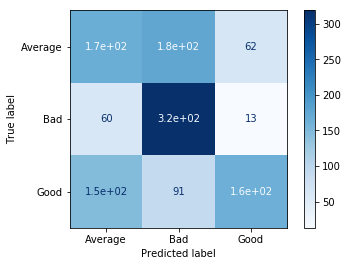

In [9]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.53084722 0.5399705  0.55384074 0.55624569 0.55094091]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.45579826472607415 0.7046019793738675 -0.28825772682504214
  -0.10797909629417606]
 [-0.45821755567357747 -0.7059423617884181 -0.2916635351593642
  -0.09416709513907746]
 [-0.21141491550725078 -0.0031579275616275076 0.8725130077194068
  -0.3905247495057231]
 ...
 [-0.4581169085501422 0.717465384690377 -0.2917362036100829
  -0.07432632961038373]
 [0.751538661872047 -0.0025887537747943763 -0.10000450010468652
  -0.05167456137188623]
 [-0.4595648294413432 0.7112979984399956 -0.2918739685292939
  -0.09370938251503302]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.4601396309088952

 Grid scores on development set:
0.460 (+/-0.018) for {'var_smoothing': 1e-06}
0.460 (+/-0.018) for {'var_smoothing': 1e-07}
0.460 (+/-0.018) for {'var_smoothing': 1e-08}
0.460 (+/-0.018) for {'var_smoothing': 1e-09}
0.460 (+/-0.018) for {'var_smoothing': 1e-10}
0.460 (+/-0.018) for {'var_smoothing': 1e-11}
0.460 (+/-0.018) for {'var_smoothing': 1e-12}
0.460 (+/-0.018) for {'var_smoothing': 1e-13}
0.460 (+/-0.018) for {'var_smoothing': 1e-14}
0.460 (+/-0.018) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.46      0.28      0.35       405
         Bad       0.53      0.49      0.51       392
        Good       0.49      0.72      0.58       403

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.48 

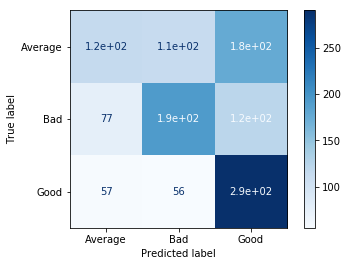

In [12]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.47942543 0.46982902 0.47266061 0.46363159 0.47202167]
